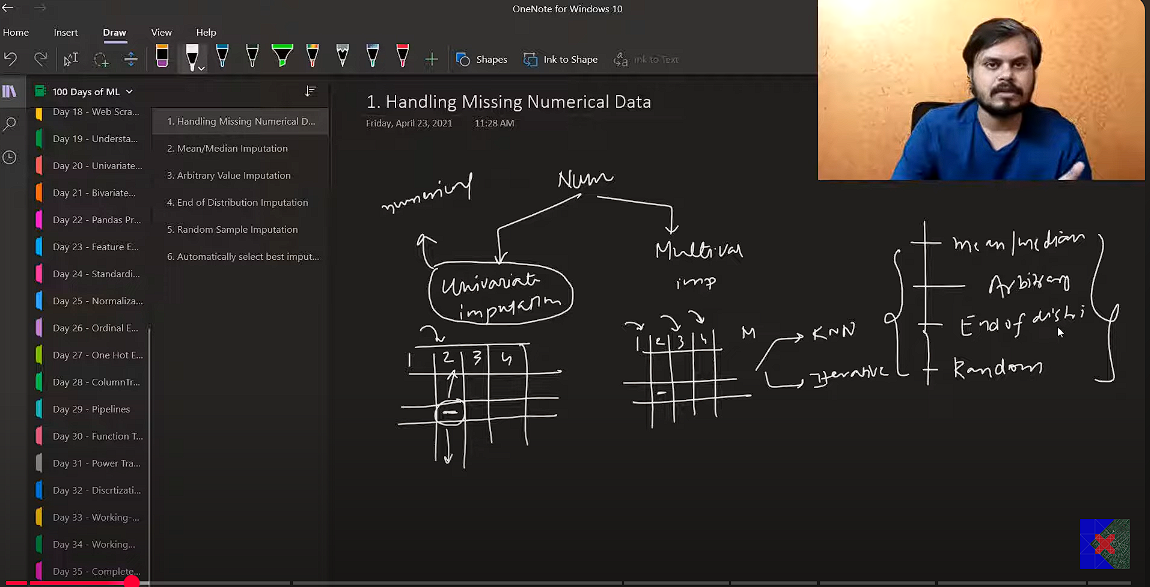

In [1]:
import csv

with open("housing_data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["ID","Price","SqFt","Beds","Baths","Year","Lot","Garage"])
    for i in range(1, 511):
        # Price: Missing if ID mod 10 equals 3.
        price = "" if i % 10 == 3 else str(200000 + i * 500 + ((i % 7) * 10000))
        # SqFt: Missing if ID mod 15 equals 7.
        sqft = "" if i % 15 == 7 else str(800 + i * 5 + ((i % 9) * 20))
        beds = (i % 6) + 1
        # Baths: Missing if ID mod 12 equals 5; otherwise, equal to beds if beds<=3 else (beds - 0.5)
        if i % 12 == 5:
            baths = ""
        else:
            baths = str(beds) if beds <= 3 else f"{beds - 0.5:.1f}"
        # Year: Missing if ID mod 33 equals 0; else year = 1950 + (ID mod 71)
        year = "" if i % 33 == 0 else str(1950 + (i % 71))
        # Lot: Missing if ID mod 20 equals 0; else lot size = 0.1 + ((ID mod 20)*0.05)
        lot = "" if i % 20 == 0 else f"{0.1 + ((i % 20) * 0.05):.2f}"
        # Garage: Missing if ID mod 25 equals 0; else garage spaces = (ID mod 4)
        garage = "" if i % 25 == 0 else str(i % 4)
        writer.writerow([i, price, sqft, beds, baths, year, lot, garage])


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Practise on MY dataset (Housing dataset)😊

In [24]:
df = pd.read_csv('housing_data.csv')

In [25]:
df.sample(4)

,ID,Price,SqFt,Beds,Baths,Year,Lot,Garage
348,349,434500.0,2685.0,2,2.0,2015.0,0.55,1.0
160,161,280500.0,1765.0,6,NaN,1969.0,0.15,1.0
406,407,413500.0,2875.0,6,5.5,2002.0,0.45,3.0
393,394,417000.0,2910.0,5,4.5,1989.0,0.80,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      510 non-null    int64  
 1   Price   459 non-null    float64
 2   SqFt    476 non-null    float64
 3   Beds    510 non-null    int64  
 4   Baths   467 non-null    float64
 5   Year    495 non-null    float64
 6   Lot     485 non-null    float64
 7   Garage  490 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 32.0 KB


#### 1. Using mean/median imputation 

In [6]:
df.isnull().mean()*100

ID         0.000000
Price     10.000000
SqFt       6.666667
Beds       0.000000
Baths      8.431373
Year       2.941176
Lot        4.901961
Garage     3.921569
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Price', 'ID']),df['Price'],test_size=0.2,random_state=2)

In [9]:
X_train.isnull().mean()*100

SqFt      6.617647
Beds      0.000000
Baths     7.843137
Year      3.186275
Lot       4.656863
Garage    4.166667
dtype: float64

In [10]:
X_test.isnull().mean()*100

SqFt       6.862745
Beds       0.000000
Baths     10.784314
Year       1.960784
Lot        5.882353
Garage     2.941176
dtype: float64

### Filling using Pandas

In [11]:
# calculating mean and median of each column and storing it inside a dictionary
stats = {}
for col in X_train.columns:
    stats[f"mean {col}"] = X_train[col].mean()
    stats[f"median {col}"] = X_train[col].median()
stats

{'mean SqFt': np.float64(2152.309711286089),
 'median SqFt': np.float64(2155.0),
 'mean Beds': np.float64(3.5098039215686274),
 'median Beds': np.float64(4.0),
 'mean Baths': np.float64(3.0664893617021276),
 'median Baths': np.float64(3.0),
 'mean Year': np.float64(1983.8455696202532),
 'median Year': np.float64(1983.0),
 'mean Lot': np.float64(0.6023136246786632),
 'median Lot': np.float64(0.6),
 'mean Garage': np.float64(1.4833759590792839),
 'median Garage': np.float64(1.0)}

In [12]:
X_train.sample(3)

,SqFt,Beds,Baths,Year,Lot,Garage
137,1550.0,1,1.0,2017.0,1.00,2.0
208,1885.0,6,NaN,2017.0,0.55,1.0
63,1140.0,5,4.5,2014.0,0.30,0.0


In [13]:
X_train.isnull().mean()*100

SqFt      6.617647
Beds      0.000000
Baths     7.843137
Year      3.186275
Lot       4.656863
Garage    4.166667
dtype: float64

In [14]:
# Then, for any column that has missing values, create new columns
# filled with the corresponding mean and median from 'stats'
for col in X_train.columns:
    if X_train[col].isnull().any():
        X_train[f"mean {col}"] = X_train[col].fillna(stats[f"mean {col}"])
        X_train[f"median {col}"] = X_train[col].fillna(stats[f"median {col}"])

In [15]:
X_train.sample(3)

,SqFt,Beds,Baths,Year,Lot,Garage,mean SqFt,median SqFt,mean Baths,median Baths,mean Year,median Year,mean Lot,median Lot,mean Garage,median Garage
421,3070.0,3,3.0,2017.0,0.20,2.0,3070.0,3070.0,3.0,3.0,2017.0,2017.0,0.20,0.20,2.0,2.0
162,1635.0,2,2.0,1971.0,0.25,3.0,1635.0,1635.0,2.0,2.0,1971.0,1971.0,0.25,0.25,3.0,3.0
90,1275.0,2,2.0,1970.0,0.65,3.0,1275.0,1275.0,2.0,2.0,1970.0,1970.0,0.65,0.65,3.0,3.0


In [16]:
for col in X_train.columns:
    print(f"{col} variance: {X_train[col].var()}")

SqFt variance: 548205.7038264953
Beds variance: 2.9188225658813893
Baths variance: 1.956900709219858
Year variance: 426.96340037267885
Lot variance: 0.0754198910767763
Garage variance: 1.2657485736769623
mean SqFt variance: 511838.24927289493
median SqFt variance: 511838.6976381461
mean Baths variance: 1.8030411939986408
median Baths variance: 1.8033615165968109
mean Year variance: 413.3257487637235
median Year variance: 413.3478585537409
mean Lot variance: 0.07189906078080885
median Lot variance: 0.07189929903165197
mean Garage variance: 1.2128794686339444
median Garage variance: 1.2222322589969647


In [17]:
def check_mean_median_columns(df, col_name):
    mean_col = f"mean {col_name}"
    median_col = f"median {col_name}"
    
    return {
        'mean_index': df.columns.get_loc(mean_col) if mean_col in df.columns else None,
        'median_index': df.columns.get_loc(median_col) if median_col in df.columns else None
    }

In [18]:
check_mean_median_columns(X_train,'Baths')

{'mean_index': 8, 'median_index': 9}

In [19]:
original_cols = [
    c for c in X_train.columns 
    if not (c.startswith('mean ') or c.startswith('median '))
]
original_cols

['SqFt', 'Beds', 'Baths', 'Year', 'Lot', 'Garage']

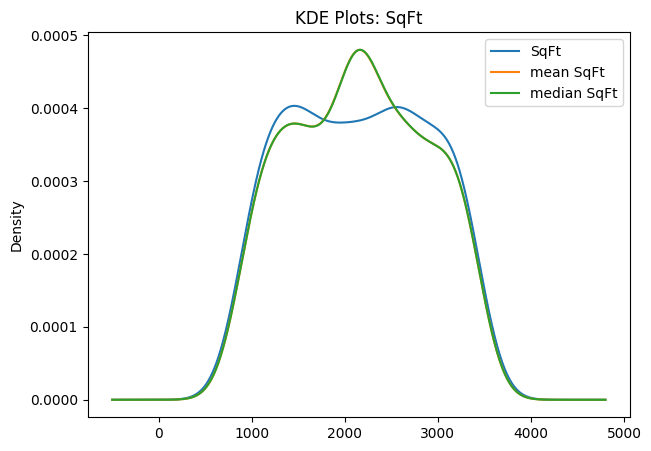

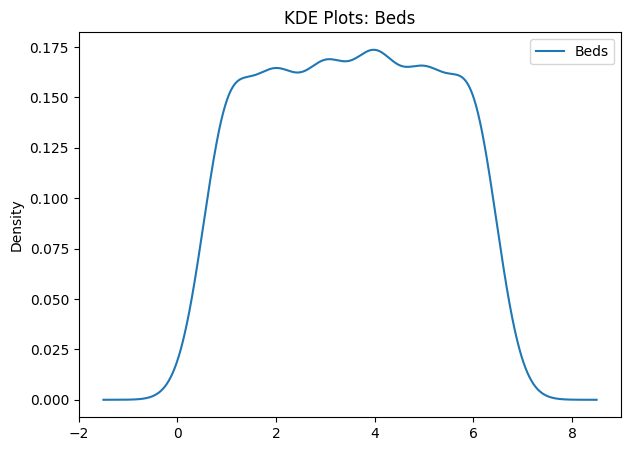

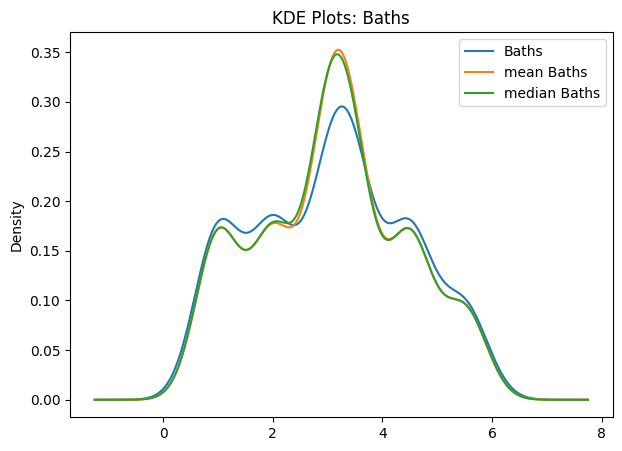

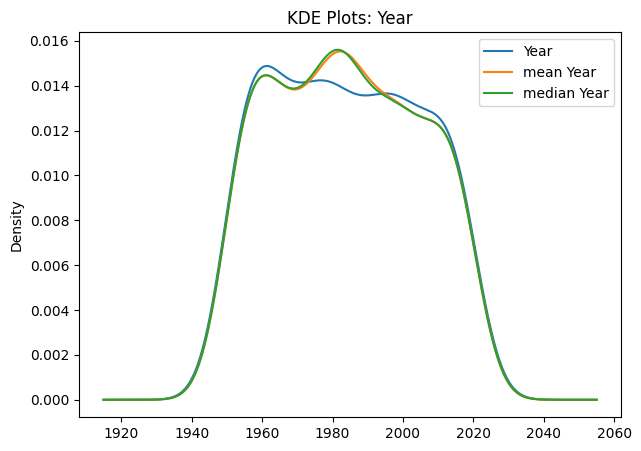

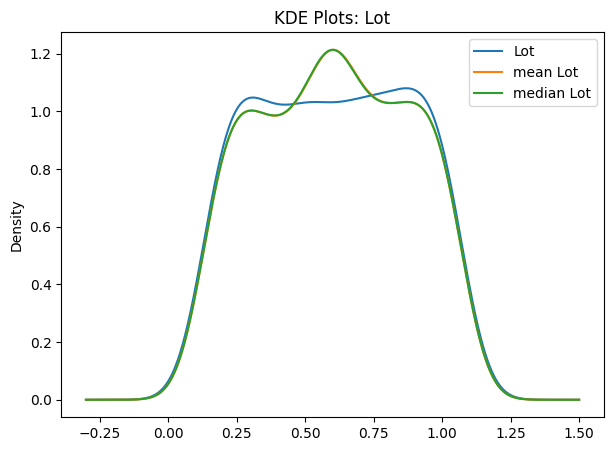

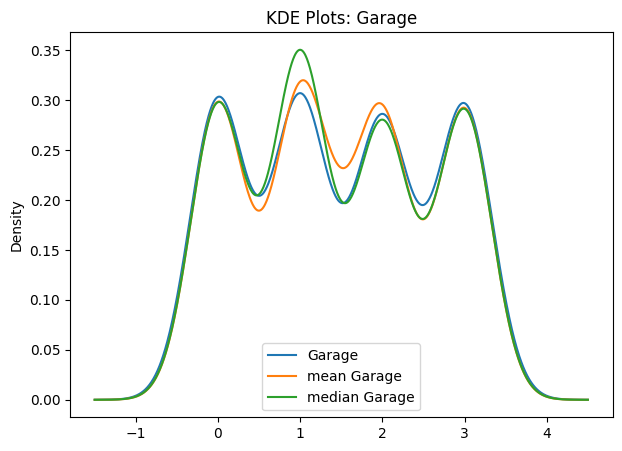

In [20]:
# If you have a list of original columns, use it; otherwise, filter out columns
# that start with "mean " or "median "
original_cols = [
    c for c in X_train.columns 
    if not (c.startswith('mean ') or c.startswith('median '))
]

for col in original_cols:
    indices = check_mean_median_columns(X_train, col)
    mean_idx = indices['mean_index']
    median_idx = indices['median_index']

    # Create a new figure for each original column
    fig, ax = plt.subplots(figsize=(7,5))
    
    # Plot the original column
    X_train[col].plot(kind='kde', ax=ax, label=col)
    
    # Plot mean column if it exists
    if mean_idx is not None:
        X_train.iloc[:, mean_idx].plot(kind='kde', ax=ax, label=f"mean {col}")
    
    # Plot median column if it exists
    if median_idx is not None:
        X_train.iloc[:, median_idx].plot(kind='kde', ax=ax, label=f"median {col}")
    
    ax.set_title(f"KDE Plots: {col}")
    ax.legend()
    plt.show()


<Axes: >

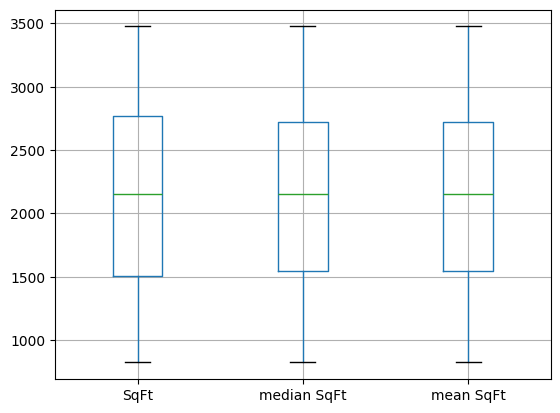

In [28]:
X_train[['SqFt','median SqFt','mean SqFt']].boxplot(flierprops={'markersize': 10})

<Axes: >

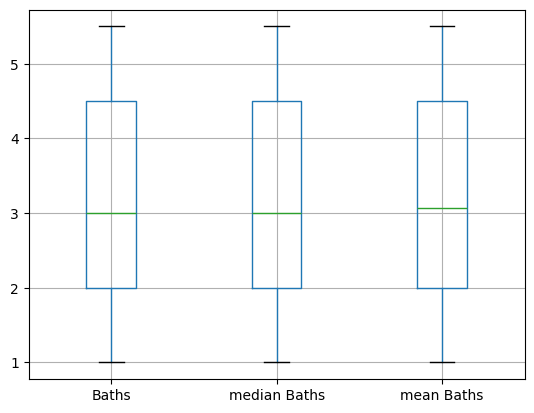

In [22]:
X_train[['Baths','median Baths','mean Baths']].boxplot()

## 1. Covereriance changes( interaction with other columns )

In [26]:
X_train.cov()

,SqFt,Beds,Baths,Year,Lot,Garage,mean SqFt,median SqFt,mean Baths,median Baths,mean Year,median Year,mean Lot,median Lot,mean Garage,median Garage
SqFt,548205.703826,-14.849220,-16.963656,794.566846,0.846169,-10.162111,548205.703826,548205.703826,-15.514296,-15.644840,765.761243,760.320728,0.811346,0.818614,-9.686768,-11.557605
Beds,-14.849220,2.918823,2.244142,1.525111,0.002146,0.303482,-13.864136,-13.875801,2.067698,2.054680,1.476397,1.500554,0.002046,0.002067,0.290806,0.293973
Baths,-16.963656,2.244142,1.956901,1.145724,0.002365,0.379143,-15.721153,-15.694574,1.956901,1.956901,1.104083,1.125199,0.002245,0.002240,0.363140,0.365156
Year,794.566846,1.525111,1.145724,426.963400,0.032847,0.594796,738.551452,737.917593,1.050841,1.046125,426.963400,426.963400,0.031126,0.031355,0.568874,0.596325
Lot,0.846169,0.002146,0.002365,0.032847,0.075420,0.010888,0.794617,0.788637,0.002170,0.002182,0.031607,0.030474,0.075420,0.075420,0.010451,0.009866
Garage,-10.162111,0.303482,0.379143,0.594796,0.010888,1.265749,-9.438389,-9.424946,0.349173,0.351728,0.574709,0.570988,0.010398,0.010530,1.265749,1.265749
mean SqFt,548205.703826,-13.864136,-15.721153,738.551452,0.794617,-9.438389,511838.249273,511838.249273,-14.485092,-14.606976,714.961357,709.881761,0.757522,0.764308,-9.044157,-10.790884
median SqFt,548205.703826,-13.875801,-15.694574,737.917593,0.788637,-9.424946,511838.249273,511838.697638,-14.460603,-14.581557,714.347744,709.272956,0.751821,0.758627,-9.031275,-10.774407
mean Baths,-15.514296,2.067698,1.956901,1.050841,0.002170,0.349173,-14.485092,-14.460603,1.803041,1.803041,1.017276,1.036731,0.002068,0.002064,0.334589,0.336446
median Baths,-15.644840,2.054680,1.956901,1.046125,0.002182,0.351728,-14.606976,-14.581557,1.803041,1.803362,1.012711,1.032025,0.002081,0.002076,0.337037,0.338868


# 2. Correlation check

In [27]:
X_train.corr()

,SqFt,Beds,Baths,Year,Lot,Garage,mean SqFt,median SqFt,mean Baths,median Baths,mean Year,median Year,mean Lot,median Lot,mean Garage,median Garage
SqFt,1.000000,-0.011645,-0.016207,0.051457,0.004174,-0.012154,1.000000,1.000000,-0.015537,-0.015667,0.050676,0.050313,0.004106,0.004143,-0.011880,-0.014118
Beds,-0.011645,1.000000,0.996107,0.043237,0.004565,0.157662,-0.011343,-0.011352,0.901323,0.895569,0.042506,0.043201,0.004466,0.004512,0.154558,0.155642
Baths,-0.016207,0.996107,1.000000,0.039805,0.006158,0.232597,-0.015708,-0.015681,1.000000,1.000000,0.038993,0.039738,0.005996,0.005984,0.228074,0.228356
Year,0.051457,0.043237,0.039805,1.000000,0.005802,0.025551,0.049808,0.049765,0.037973,0.037797,1.000000,1.000000,0.005633,0.005674,0.025039,0.026145
Lot,0.004174,0.004565,0.006158,0.005802,1.000000,0.035521,0.004052,0.004021,0.005899,0.005933,0.005668,0.005465,1.000000,1.000000,0.034976,0.032886
Garage,-0.012154,0.157662,0.232597,0.025551,0.035521,1.000000,-0.011718,-0.011701,0.230846,0.232511,0.025088,0.024924,0.034031,0.034463,1.000000,1.000000
mean SqFt,1.000000,-0.011343,-0.015708,0.049808,0.004052,-0.011718,1.000000,1.000000,-0.015078,-0.015204,0.049155,0.048805,0.003949,0.003984,-0.011479,-0.013643
median SqFt,1.000000,-0.011352,-0.015681,0.049765,0.004021,-0.011701,1.000000,1.000000,-0.015053,-0.015177,0.049113,0.048763,0.003919,0.003955,-0.011462,-0.013622
mean Baths,-0.015537,0.901323,1.000000,0.037973,0.005899,0.230846,-0.015078,-0.015053,1.000000,0.999911,0.037264,0.037976,0.005745,0.005733,0.226256,0.226640
median Baths,-0.015667,0.895569,1.000000,0.037797,0.005933,0.232511,-0.015204,-0.015177,0.999911,1.000000,0.037094,0.037800,0.005778,0.005765,0.227891,0.228251


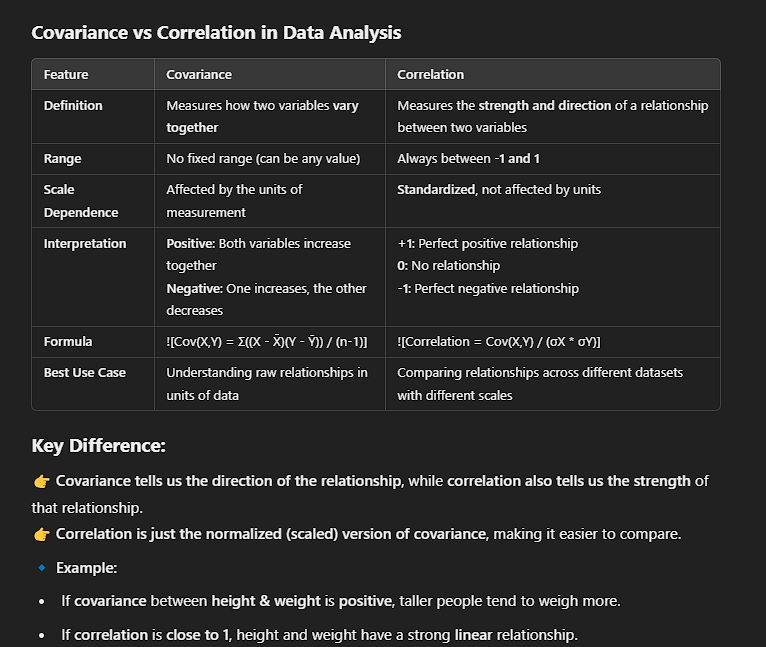

# Now we will focus on what if we want to apply different strategies on different columns

In [30]:
df.columns

Index(['ID', 'Price', 'SqFt', 'Beds', 'Baths', 'Year', 'Lot', 'Garage'], dtype='object')

In [31]:
df.isnull().mean()*100

ID         0.000000
Price     10.000000
SqFt       6.666667
Beds       0.000000
Baths      8.431373
Year       2.941176
Lot        4.901961
Garage     3.921569
dtype: float64

In [32]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Price', 'ID']),df['Price'],test_size=0.2,random_state=2)

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [39]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['SqFt']),
    ('imputer2',imputer2,['Baths'])
], remainder='passthrough')

In [40]:
trf.fit(X_train)

D:\DATA SCIENCE\My machine learnings\venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['SqFt']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Baths'])])

In [41]:
trf.named_transformers_['imputer1'].statistics_

array([2152.30971129])

In [42]:
trf.named_transformers_['imputer2'].statistics_

array([3.])

In [43]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [44]:
X_train

array([[2.575e+03, 5.500e+00, 6.000e+00, 1.989e+03, 2.500e-01, 3.000e+00],
       [1.030e+03, 3.000e+00, 3.000e+00, 1.988e+03, 1.000e+00, 2.000e+00],
       [3.405e+03, 2.000e+00, 2.000e+00, 2.017e+03, 7.500e-01, 1.000e+00],
       ...,
       [3.430e+03, 3.000e+00, 3.000e+00, 2.018e+03, 8.000e-01, 2.000e+00],
       [1.020e+03, 4.500e+00, 5.000e+00, 1.966e+03, 9.000e-01, 0.000e+00],
       [1.785e+03, 2.000e+00, 2.000e+00, 1.977e+03, 5.500e-01, 1.000e+00]],
      shape=(408, 6))

In [45]:
X_test

array([[2.65500000e+03, 2.00000000e+00, 2.00000000e+00, 1.95000000e+03,
        8.50000000e-01, 3.00000000e+00],
       [2.31000000e+03, 4.50000000e+00, 5.00000000e+00, 1.96400000e+03,
        1.00000000e+00, 2.00000000e+00],
       [2.38500000e+03, 2.00000000e+00, 2.00000000e+00, 1.96700000e+03,
        1.50000000e-01, 1.00000000e+00],
       [2.99000000e+03, 1.00000000e+00, 1.00000000e+00, 1.95000000e+03,
        4.00000000e-01, 2.00000000e+00],
       [2.15230971e+03, 4.50000000e+00, 5.00000000e+00, 1.98800000e+03,
        2.00000000e-01, 2.00000000e+00],
       [1.71000000e+03, 4.50000000e+00, 5.00000000e+00, 1.97400000e+03,
        4.00000000e-01, 2.00000000e+00],
       [2.23500000e+03, 2.00000000e+00, 2.00000000e+00, 1.99600000e+03,
        1.05000000e+00, 3.00000000e+00],
       [1.56500000e+03, 3.50000000e+00, 4.00000000e+00, 1.96100000e+03,
        7.50000000e-01, 1.00000000e+00],
       [2.89500000e+03, 2.00000000e+00, 2.00000000e+00, 2.01000000e+03,
        8.50000000e-01, 

# 2. Second Strategy (Arbitrary Value Imputation)